# Probabilidad

La probabilidad mide la certeza de que ocurra un evento específico, expresada como un número entre 0 y 1, donde 0 indica imposibilidad y 1 indica certeza absoluta.

Ejemplo: Si se lanza un dado (de seis caras), la probabilidad de que salga un "3" es de 1/6, ya que hay una cara favorable sobre seis posibles. Esto significa que cada uno de los seis números (1, 2, 3, 4, 5, 6) tiene la misma probabilidad de aparecer.

![Cargando Datos](http://www.solin.16mb.com/retomatondacero/20200713/20200713.gif "Cargando")

 

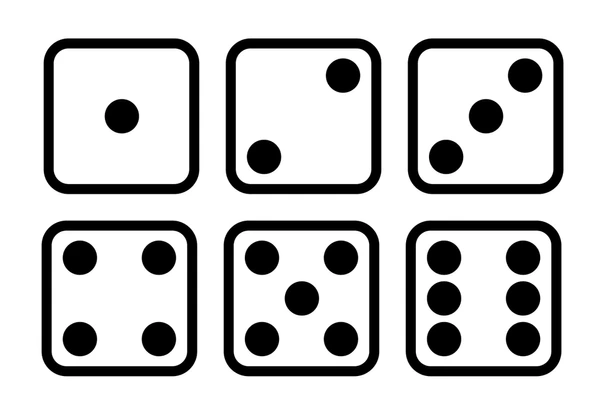


$P(A) =  \frac{N^{\circ} CASOS-FAVORABLES}{N^{\circ} CASOS-POSIBLES}$


$P(3) =  \frac{1}{6}$

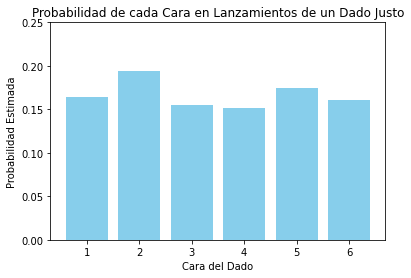

{1: 0.164, 2: 0.194, 3: 0.155, 4: 0.151, 5: 0.175, 6: 0.161}


In [1]:
import random
import matplotlib.pyplot as plt

# Definimos la función para simular lanzar un dado justo
def lanzar_dado():
    return random.randint(1, 6)

# Simulamos lanzar el dado 1000 veces
resultados = [lanzar_dado() for _ in range(1000)]

# Contamos cuántas veces salió cada número
conteo_resultados = {numero: resultados.count(numero) for numero in range(1, 7)}

# Calculamos la probabilidad experimental de que salga cada número
probabilidades = {numero: conteo / 1000 for numero, conteo in conteo_resultados.items()}

probabilidades
# Crear el gráfico de barras
fig, ax = plt.subplots()
ax.bar(probabilidades.keys(), probabilidades.values(), color='skyblue')
ax.set_xlabel('Cara del Dado')
ax.set_ylabel('Probabilidad Estimada')
ax.set_title('Probabilidad de cada Cara en Lanzamientos de un Dado Justo')
ax.set_ylim(0, 0.25)  # Ajustar el límite del eje y para mejor visualización
plt.xticks(range(1, 7))  # Asegurar que se muestren todas las caras del dado

# Mostrar el gráfico
plt.show()
print(probabilidades)

# Probabilidad Condicional

Una probabilidad condicional depende del hecho de que el primer evento (sacar un AS) ya ocurrió, afectando el resultado del segundo evento.
Ejemplo: 

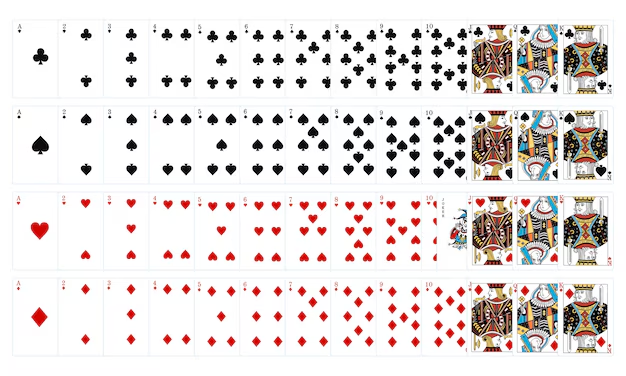

1. Probabilidad de sacar un AS en la primera carta:
En una baraja estándar de 52 cartas, hay 4 ases. La probabilidad de sacar un AS como primera carta es simplemente el número de ases dividido por el número total de cartas:

$P(AS-en-primera-carta) =  \frac{4}{52} = \frac{1}{13} $

2. Probabilidad de sacar otro AS en la segunda carta dado que el primer AS ya fue sacado:

Una vez que se saca un AS y no se repone en la baraja, quedan 51 cartas en total y solo 3 ases restantes. La probabilidad condicional de sacar un segundo AS, sabiendo que ya se sacó un AS y este no se repuso, se calcula contando los ases restantes y dividiendo por el nuevo total de cartas:

$P(AS-en-segunda-carta) =  \frac{3}{51}$




Probabilidad de sacar un As como primera carta: 0.0777
Probabilidad de sacar otro As como segunda carta dado que el primero fue As: 0.0515


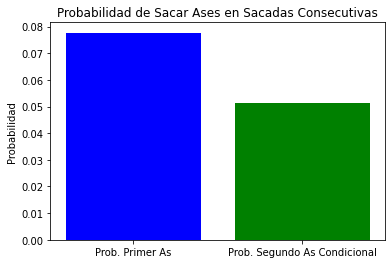

In [2]:
import random
import matplotlib.pyplot as plt

# Definir la baraja de cartas
def crear_baraja():
    """Crea una baraja de 52 cartas con 4 ases."""
    return ['As' if i < 4 else 'Otra carta' for i in range(52)]

# Simulación de sacar cartas
def sacar_cartas(baraja):
    """Simula sacar dos cartas y devuelve si eran ases o no."""
    random.shuffle(baraja)
    primera = baraja.pop()
    segunda = baraja.pop()
    return primera == 'As', segunda == 'As'

# Calcular probabilidades
def calcular_probabilidades(n_simulaciones):
    """Calcula la probabilidad de sacar ases en dos sacadas consecutivas."""
    baraja = crear_baraja()
    conteo_ases = 0
    conteo_ases_consecutivos = 0
    
    for _ in range(n_simulaciones):
        baraja = crear_baraja()  # Restaurar la baraja para cada simulación
        primera_as, segunda_as = sacar_cartas(baraja)
        if primera_as:
            conteo_ases += 1
            if segunda_as:
                conteo_ases_consecutivos += 1
    
    prob_primera_as = conteo_ases / n_simulaciones
    prob_segunda_as_condicional = (conteo_ases_consecutivos / conteo_ases) if conteo_ases else 0
    return prob_primera_as, prob_segunda_as_condicional

# Visualizar los resultados
n_simulaciones = 10000
prob_primera_as, prob_segunda_as_condicional = calcular_probabilidades(n_simulaciones)

print(f"Probabilidad de sacar un As como primera carta: {prob_primera_as:.4f}")
print(f"Probabilidad de sacar otro As como segunda carta dado que el primero fue As: {prob_segunda_as_condicional:.4f}")

# Gráfica
fig, ax = plt.subplots()
ax.bar(['Prob. Primer As', 'Prob. Segundo As Condicional'], [prob_primera_as, prob_segunda_as_condicional], color=['blue', 'green'])
ax.set_ylabel('Probabilidad')
ax.set_title('Probabilidad de Sacar Ases en Sacadas Consecutivas')
plt.show()


3. Independencia
Dos eventos son independientes si la ocurrencia de uno no afecta la probabilidad de ocurrencia del otro.

Ejemplo: Si lanzas dos dados, la probabilidad de que salga un "6" en el primer dado es 1/6, y la probabilidad de que salga un "6" en el segundo dado también es 1/6. El resultado del primer dado no afecta el resultado del segundo dado; por lo tanto, son eventos independientes.

Probabilidad de que salga '6' en el primer dado: 0.1636
Probabilidad de que salga '6' en el segundo dado: 0.1580


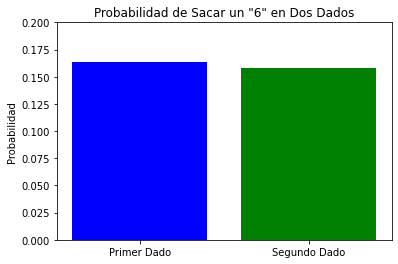

In [5]:
import random
import matplotlib.pyplot as plt

def lanzar_dado():
    """Devuelve el resultado de lanzar un dado justo de seis caras."""
    return random.randint(1, 6)

def simular_lanzamientos(n):
    """Simula lanzar dos dados n veces y cuenta las veces que sale '6'."""
    conteo_primer_dado = 0
    conteo_segundo_dado = 0
    
    for _ in range(n):
        resultado_primer_dado = lanzar_dado()
        resultado_segundo_dado = lanzar_dado()
        
        if resultado_primer_dado == 6:
            conteo_primer_dado += 1
        if resultado_segundo_dado == 6:
            conteo_segundo_dado += 1
    
    return conteo_primer_dado, conteo_segundo_dado

# Número de simulaciones
n_simulaciones = 10000

# Realizar simulaciones
conteo_primer_dado, conteo_segundo_dado = simular_lanzamientos(n_simulaciones)

# Calcular probabilidades
prob_primer_dado = conteo_primer_dado / n_simulaciones
prob_segundo_dado = conteo_segundo_dado / n_simulaciones

# Imprimir resultados
print(f"Probabilidad de que salga '6' en el primer dado: {prob_primer_dado:.4f}")
print(f"Probabilidad de que salga '6' en el segundo dado: {prob_segundo_dado:.4f}")

# Gráfico de las probabilidades
fig, ax = plt.subplots()
ax.bar(['Primer Dado', 'Segundo Dado'], [prob_primer_dado, prob_segundo_dado], color=['blue', 'green'])
ax.set_ylim(0, 0.2)
ax.set_ylabel('Probabilidad')
ax.set_title('Probabilidad de Sacar un "6" en Dos Dados')
plt.show()


Probabilidad de tener la enfermedad dado un resultado positivo: 0.5000


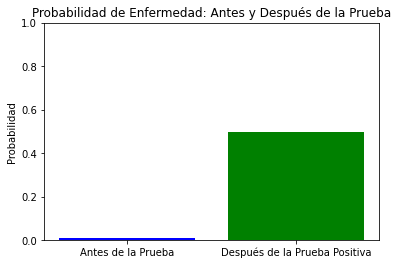

In [35]:
import matplotlib.pyplot as plt

# Parámetros iniciales
p_enfermedad = 0.01  # Probabilidad previa de tener la enfermedad
p_no_enfermedad = 1 - p_enfermedad  # Probabilidad de no tener la enfermedad
p_positivo_dado_enfermedad = 0.99  # Sensibilidad de la prueba
p_negativo_dado_no_enfermedad = 0.99  # Especificidad de la prueba
p_positivo_dado_no_enfermedad = 1 - p_negativo_dado_no_enfermedad  # Probabilidad de falso positivo

# Aplicando el Teorema de Bayes
p_positivo = (p_positivo_dado_enfermedad * p_enfermedad) + (p_positivo_dado_no_enfermedad * p_no_enfermedad)
p_enfermedad_dado_positivo = (p_positivo_dado_enfermedad * p_enfermedad) / p_positivo

# Mostrar el resultado
print(f"Probabilidad de tener la enfermedad dado un resultado positivo: {p_enfermedad_dado_positivo:.4f}")

# Visualización
fig, ax = plt.subplots()
ax.bar(['Antes de la Prueba', 'Después de la Prueba Positiva'], [p_enfermedad, p_enfermedad_dado_positivo], color=['blue', 'green'])
ax.set_ylim(0, 1)
ax.set_ylabel('Probabilidad')
ax.set_title('Probabilidad de Enfermedad: Antes y Después de la Prueba')
plt.show()


# ¿Qué es una Variable Aleatoria?

Una variable aleatoria es una función que asigna un número real a cada resultado de un experimento aleatorio. Puede tomar uno o más valores numéricos asociados con los resultados de algún fenómeno aleatorio.

Hay dos tipos principales de variables aleatorias:

- Variables Aleatorias Discretas: Son aquellas que toman valores contables, como contar el número de eventos que ocurren. Los valores que puede tomar son finitos o se pueden listar en un conjunto infinito contable.

- Variables Aleatorias Continuas: Estas toman valores en un intervalo continuo. Pueden tomar cualquier valor dentro de un rango específico.

Ejemplo continua: Medir la altura de los estudiantes en una escuela.

Podemos definir una variable aleatoria 𝑌 que representa la altura de un estudiante seleccionado al azar. 
𝑌 es continua porque la altura puede medirse en cualquier valor dentro de un rango, por ejemplo, de 1.50 metros a 2 metros.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la distribución normal
media = 175  # media de la altura en cm
desviacion_estandar = 10  # desviación estándar de la altura

# Generar muestras de una distribución normal
alturas = np.random.normal(media, desviacion_estandar, 1000)

# Crear un histograma para visualizar la distribución de las alturas
plt.figure(figsize=(10, 6))
plt.hist(alturas, bins=30, color='blue', alpha=0.7)
plt.title('Distribución de Alturas en una Población Adulta')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Variable Aleatoria Discreta

Ejemplo: Lanzar un dado.

Aquí, la variable aleatoria 𝑋 puede representar el resultado de un lanzamiento de dado, que puede ser cualquier número entero entre 1 y 6. Cada número tiene una probabilidad de 1/6 de ocurrir.

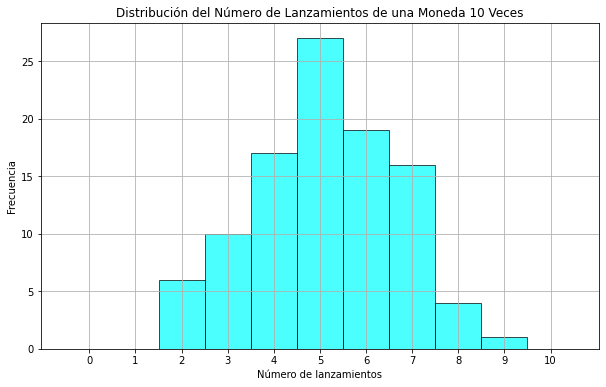

[7 2 6 6 6 5 9 4 7 2 4 6 5 6 6 2 5 4 7 4 5 3 5 6 7 5 2 4 5 5 8 5 6 8 7 5 7
 4 4 5 5 8 4 5 7 6 4 6 3 7 5 7 6 5 6 6 7 6 4 5 7 5 3 7 4 6 4 5 2 4 7 2 5 5
 3 4 8 7 5 3 5 3 6 5 7 6 3 4 5 4 5 3 3 5 7 5 4 6 6 3]


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para la distribución binomial
n = 10  # número de lanzamientos de la moneda
p = 0.5  # probabilidad de sacar cara en cada lanzamiento

# Simular 1000 experimentos de lanzar la moneda 10 veces
resultados = np.random.binomial(n, p, 100)

# Crear un histograma para visualizar la distribución de los resultados
plt.figure(figsize=(10, 6))
plt.hist(resultados, bins=np.arange(12) - 0.5, edgecolor='black', color='cyan', alpha=0.7)
plt.title('Distribución del Número de Lanzamientos de una Moneda 10 Veces')
plt.xlabel('Número de lanzamientos')
plt.ylabel('Frecuencia')
plt.xticks(range(11))  # Ajustar las marcas del eje x para mostrar todos los resultados posibles
plt.grid(True)
plt.show()
print(resultados)


# Distribuciones de Probabilidad
Una distribución de probabilidad describe cómo se distribuyen las probabilidades entre los diferentes valores que puede tomar una variable aleatoria. Para las variables aleatorias discretas, esta distribución se puede describir mediante una función de masa de probabilidad (PMF - Probability Mass Function), y para las variables continuas, mediante una función de densidad de probabilidad (PDF - Probability Density Function).

## Distribución de Probabilidad Discreta
Ejemplo: Distribución binomial.

Imagina que lanzas una moneda justa (dos posibles resultados con igual probabilidad) cinco veces. La variable aleatoria 𝑍 representa el número de veces que aparece cara. La distribución de 𝑍 se describe por una distribución binomial.

## Distribución de Probabilidad Continua

Ejemplo: Distribución normal (también conocida como gaussiana).

Considera que estás midiendo la altura de adultos en una ciudad. Si 𝑌 es la altura de una persona seleccionada al azar, es probable que 𝑌 siga una distribución normal, donde la mayoría de las alturas estarán alrededor de la media (por ejemplo, 1.75 metros), con una disminución en la probabilidad a medida que las alturas se alejan de la media hacia valores más bajos o más altos.

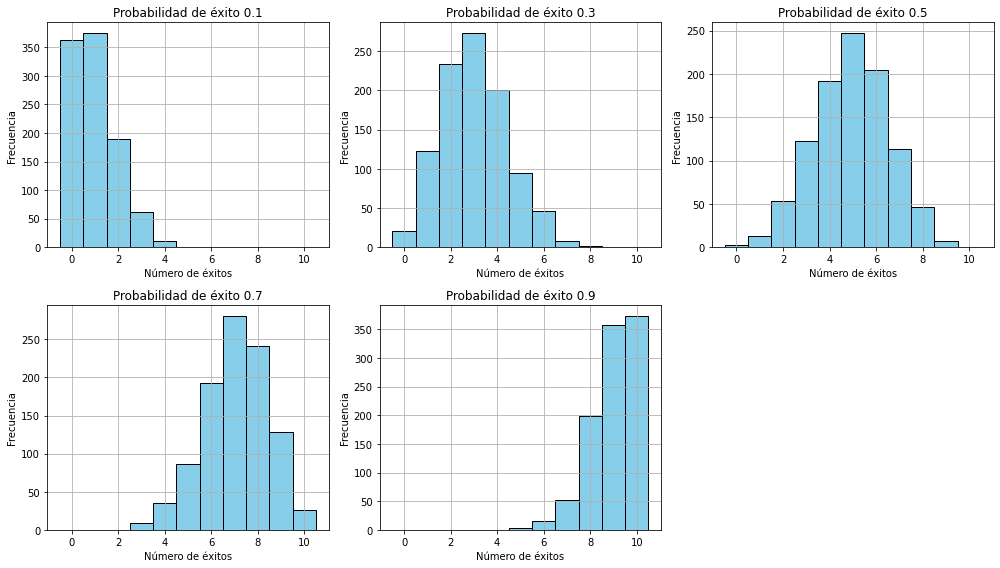

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_binomial_distribution(trials, prob_success, num_simulations=1000):
    """Genera y grafica la distribución binomial para diferentes probabilidades de éxito."""
    plt.figure(figsize=(14, 8))
    
    # Crear subplots para cada probabilidad
    for i, p in enumerate(prob_success, start=1):
        # Generar datos binomiales
        data = np.random.binomial(trials, p, num_simulations)
        
        # Crear histograma
        plt.subplot(2, 3, i)
        plt.hist(data, bins=np.arange(trials+2) - 0.5, color='skyblue', edgecolor='black')
        plt.title(f'Probabilidad de éxito {p}')
        plt.xlabel('Número de éxitos')
        plt.ylabel('Frecuencia')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Parámetros
n = 10  # número de lanzamientos
probabilities = [0.1, 0.3, 0.5, 0.7, 0.9]  # diferentes probabilidades de sacar cara

# Llamar a la función para graficar la distribución binomial
plot_binomial_distribution(n, probabilities)


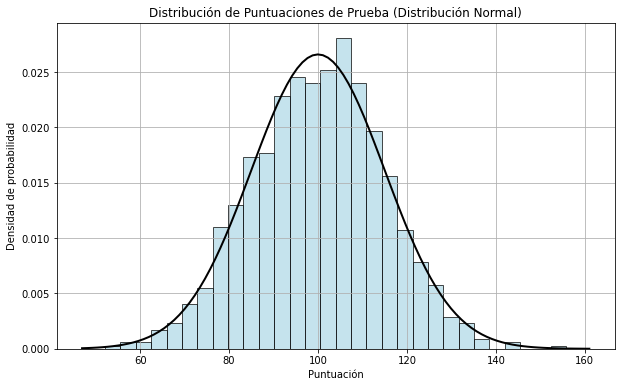

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de la distribución normal
media = 100  # media de la puntuación en la prueba
desviacion_estandar = 15  # desviación estándar de la puntuación

# Generar datos de puntuaciones de prueba
puntuaciones = np.random.normal(media, desviacion_estandar, 1000)

# Configuración del histograma
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(puntuaciones, 30, density=True, color='lightblue', edgecolor='black', alpha=0.7)

# Añadir la curva de la función de densidad de probabilidad (PDF)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media, desviacion_estandar)
plt.plot(x, p, 'k', linewidth=2)

# Títulos y etiquetas
plt.title('Distribución de Puntuaciones de Prueba (Distribución Normal)')
plt.xlabel('Puntuación')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)

# Mostrar el gráfico
plt.show()


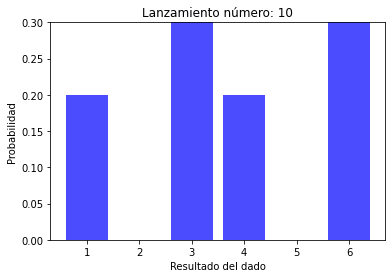

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Simular lanzamientos de un dado
def lanzar_dado():
    return np.random.randint(1, 7)

# Actualizar la función de la animación
def update(frame):
    lanzamiento = lanzar_dado()
    conteos[lanzamiento - 1] += 1
    n_lanzamientos[0] += 1
    probabilidades = conteos / n_lanzamientos[0]
    for i, bar in enumerate(bars):
        bar.set_height(probabilidades[i])
    ax.set_title(f'Lanzamiento número: {n_lanzamientos[0]}')
    return bars

# Configuración inicial
fig, ax = plt.subplots()
conteos = np.zeros(6)
n_lanzamientos = [0]
probabilidades = conteos / 1
bars = ax.bar(range(1, 7), probabilidades, tick_label=[1, 2, 3, 4, 5, 6], color='blue', alpha=0.7)

# Configuración de ejes
ax.set_ylim(0, 0.3)
ax.set_ylabel('Probabilidad')
ax.set_xlabel('Resultado del dado')
ax.set_title('Simulación de lanzamiento de dado')

# Crear animación
ani = FuncAnimation(fig, update, frames=range(1, 10), blit=False)

HTML(ani.to_jshtml())
